## Complete Case Analysis

Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists of **discarding** observations with **any** missing values. In other words, we only keep observations with data on all the variables.

### Which variables can I impute with CCA?

CCA can be applied to both categorical and numerical variables.

### Assumptions

CCA works well when the data is missing completely at random. In this scenario, excluding observations with missing information would be the same as randomly excluding some observations from the dataset. Therefore, the dataset after CCA remains a fair representation of the original dataset.

### Advantages

- No data manipulation required.

- Preserves variable distribution (assumming data is missing at random).

### Disadvantages

- It can discard a large fraction of the original dataset (if missing data is abundant).

- Excluded observations could be informative (if data is not missing at random).

- CCA will create a biased dataset (i.e., the complete dataset differs from the original data) if the data is not missing at random.

- When using our models in production, the model will not be able to handle missing data.

### When to use CCA

- Data is missing completely at random

- No more than 5% of the total dataset contains missing data

In practice, CCA may be an acceptable method when the proportion of missing information is small. There is no rule of thumb to determine how much missing data is small. However, as general guidance, if the proportion of missing data is <= 5%, CCA could be a viable option.

### Models and CCA in production

When using CCA, we remove all observations with missing information. However, the data that we want to score with our model may indeed contain missing information. This will pose a problem when using our model in production: when an observation contains missing data, the model will not be able to handle it. 

Therefore, when putting models into production, we need to do 1 of 2 things: either we do not score observations with missing data, or we replace the missing values with another value.

## In this demo:

We will use the House Prices dataset to demonstrate how to perform Complete Case Analysis.

- For instructions on how to download the dataset, please refer to the lecture **Download Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To display all columns of the dataframe.
pd.set_option('display.max_columns', None)

In [2]:
# Let's load the House Prices dataset
# and explore its shape (rows and columns).

data = pd.read_csv('houseprice.csv')
data.shape

(1460, 81)

In [3]:
# Let's see the first 5 rows.

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Find the variables with missing observations.

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
# Let's find out whether they are numerical or categorical.

data[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

There are numerical and categorical variables with missing observations. We can see from the variable types that some are float and some are object.

In [6]:
# Let's have a look at the values of the variables with
# missing data.

data[vars_with_na].head(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [7]:
# Let's find out the proportion of missing observations per variable.

# Calculate the proportion of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas.
data_na = data[vars_with_na].isnull().mean()

# Transform the array into a dataframe.
data_na = pd.DataFrame(data_na.reset_index())

# Add column names to the dataframe.
data_na.columns = ['variable', 'na_fraction']

# Order the dataframe according to proportion of na per variable.
data_na.sort_values(by='na_fraction', ascending=False, inplace=True)

# Show
data_na

,variable,na_fraction
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


The first 6 variables contain a lot of missing information, so we can't use CCA if we consider those variables, because we would discard most of the observations in the dataset. We could use CCA if we omitted those variables.

For this demonstration, I'll skip the first six variables that have a lot of missing data and use CCA on the rest of the dataset.

In [8]:
# Capture variables with less than 5% NA
# in a list.

vars_cca = [var for var in vars_with_na if data[var].isnull().mean() < 0.05]
vars_cca

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [9]:
# Calculate the proportion of observations with complete
# cases: i.e., with values on all the variables.

# The method dropna() discards observations that contain
# any NA.

len(data.dropna(subset=vars_cca)) / len(data)

0.9671232876712329

In [10]:
# Create the complete case dataset,
# in other words, remove observations 
# with na in any variable.

data_cca = data.dropna(subset=vars_cca)

data.shape, data_cca.shape

((1460, 81), (1412, 81))

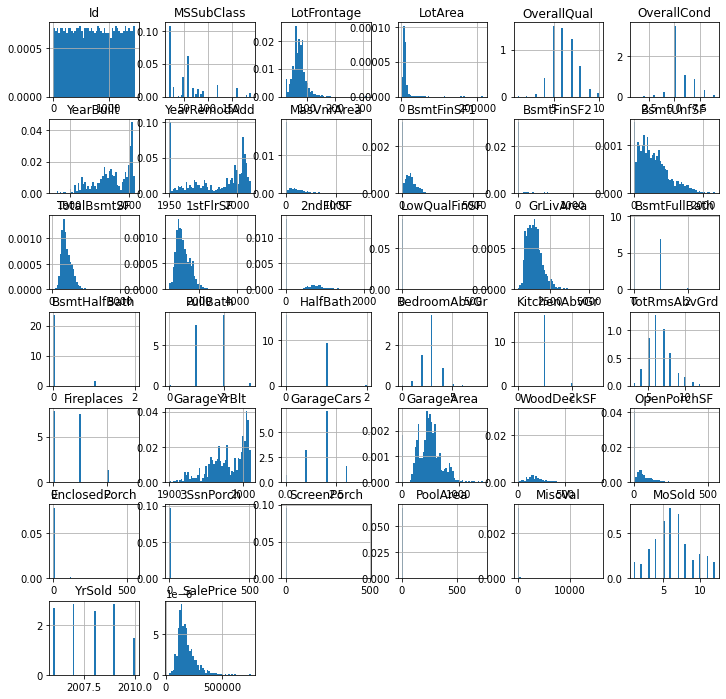

In [11]:
# Plot the histograms for all numerical variables in the complete
# case dataset (as we did in section 3).

data_cca.hist(bins=50, density=True, figsize=(12, 12))

plt.show()

<AxesSubplot:>

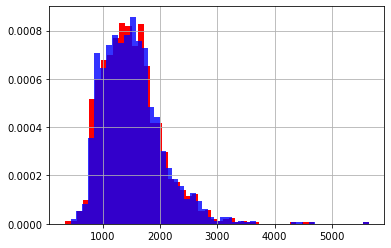

In [12]:
## Let's check the distribution of a few variables before and after 
# cca: histogram.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# Data after cca: the argument "alpha" makes 
# the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

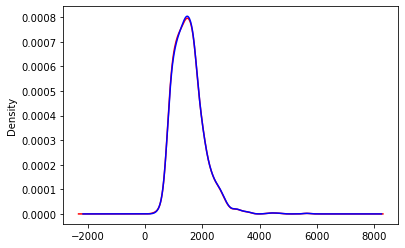

In [13]:
# Let's check the distribution of a few variables before and after 
# cca: density plot.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['GrLivArea'].plot.density(color='red')

# Data after cca.
data_cca['GrLivArea'].plot.density(color='blue')

<AxesSubplot:>

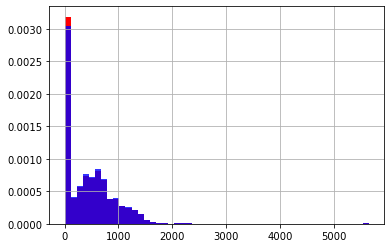

In [14]:
# Let's check the distribution of a few variables before and after 
# cca: histogram.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['BsmtFinSF1'].hist(bins=50, ax=ax, density=True, color='red')

# Data after cca: the argument "alpha" makes 
# the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

data_cca['BsmtFinSF1'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

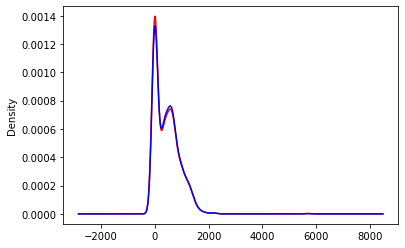

In [15]:
# Let's check the distribution of a few variables before and after 
# cca: density plot.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['BsmtFinSF1'].plot.density(color='red')

# Data after cca.
data_cca['BsmtFinSF1'].plot.density(color='blue')

As we can see from the plots, the distribution of the numerical variables in the original and complete case datasets is very similar, which is what we expect from CCA when data is missing at random.

In the next few cells, I will explore the distribution of categorical variables. To do so, I will evaluate the percentage of observations that show each of the unique categories, as we did in sections 2 and 3 of the course.

In [22]:
# The following function captures the percentage of observations
# per category in the original and complete case datasets
# and puts them together in a new dataframe.


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [23]:
# Run the function in a categorical variable.

categorical_distribution(data, data_cca, 'BsmtQual')

,original,cca
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


In [24]:
categorical_distribution(data, data_cca, 'MasVnrType')

,original,cca
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


In [25]:
categorical_distribution(data, data_cca, 'SaleCondition')

,original,cca
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


As we can see from the output of the cells above, the distribution of houses in each of the categories is very similar in the original and complete case datasets, which is what is expected if the data is missing completely at random.

<hr/>

## Mean / Median imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

**Note**:

If a variable is normally distributed, the mean, median, and mode are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. 

If the variable is skewed, the mean is biased towards values at the end of the distribution. As a result, the median represents the majority of the values in the variable better. 

Replacing missing data by the mode is not common practice for numerical variables.

### Which variables can I impute with mean or median imputation?

The mean and median can only be calculated on numerical variables. Therefore, these methods are suitable for continuous and discrete numerical variables only.

### Assumptions

- Data is missing completely at random.

If data is missing at random, it's safe to assume that the missing values are extremely close to the mean or median of the distribution, which is the value of the majority of the observations. 

### Advantages

- Fast way of obtaining complete datasets

- Can be integrated into production (during model deployment)

### Limitations

- Distortion of the original variable distribution (if the fraction of NA is large):

    - Distortion of the variance

    - Distortion of the covariance with other variables of the dataset

If the proportion of NA is large, the variance of the variable will be distorted when it is replaced with the mean or median, resulting in an underestimating of the variance. 

Estimates of covariance and correlations with other variables may also be affected. Because the mean or median value that now substitutes the missing data does not always retain the relation with the remaining variables, mean or median imputation may change intrinsic correlations. 

Finally, "concentrating" missing values at the mean or median value may lead to observations that are common occurrences in the distribution being picked up as outliers.

### When should mean or median imputation be used?

- Data is missing completely at random

- No more than 5% of the variable contains missing data

Although in theory, the above conditions should be met to minimise the impact of this imputation technique, in practice, mean / median imputation is very commonly used, even when data is not MCAR and the fraction of missing values is large. The reason behind this, is the simplicity of the technique.

### Final note

Replacement of NA with mean or median is widely used in the data science community and in data science competitions. See, for example, the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"]( http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

Typically, mean and median imputation is done together with adding a "missing indicator" variable to mark observations where the data was missing (see lecture "Missing Indicator"), thus covering 2 angles: if the data was missing completely at random, this would be captured by the mean and median imputation, and if it wasn't, this would be captured by the additional "missing indicator" variable. Both methods are extremely straightforward to implement and therefore are a top choice for imputation.

## In this demo:

We will learn how to perform mean and median imputation using pandas on the Ames House Price and Titanic datasets.

- To download the datasets, please refer to the lecture **Datasets** in **Section 1** of this course.

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

## Titanic

In [27]:
# Load the Titanic dataset with a few variables for demonstration.

data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [28]:
# Let's look at the fraction of NA.

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

Age and fare show missing data. If instead of mean(), we use sum(), we will see that fare only has 1 missing value.

### Imputation important

The imputation values (that is the mean/median) should be calculated using the training set, and the same value should be used to impute the test set. This is to avoid overfitting.

In [30]:
# Let's separate into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.5,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((654, 2), (655, 2))

In [31]:
# Let's explore the missing data in the train set.
# The percentage of NA should be fairly similar to those
# observed in the whole dataset.

X_train.isnull().mean()

age     0.191131
fare    0.000000
dtype: float64

In [32]:
# Calculate the median Age.

median = X_train.age.median()
median

28.0

In [33]:
# Calculate the mean Age

mean = X_train.age.mean()

# The mean contains many decimals, so I round to 1
# using the round function from numpy.
mean = np.round(mean, 1)

mean

30.0

In [34]:
# Create a new variable with the missing values replaced
# using the function we created above.

# First, replace with the median.
X_train['Age_median'] = X_train['age'].fillna(median)

# Now replace with the mean.
X_train['Age_mean'] = X_train['age'].fillna(mean)

X_train.head(15)

,age,fare,Age_median,Age_mean
293,NaN,52.0000,28.0,30.0
76,39.0,83.1583,39.0,39.0
48,53.0,27.4458,53.0,53.0
689,22.0,7.2500,22.0,22.0
1195,NaN,7.7500,28.0,30.0
1182,21.0,7.6500,21.0,21.0
332,23.0,10.5000,23.0,23.0
576,40.0,13.0000,40.0,40.0
622,4.0,31.2750,4.0,4.0
564,40.0,13.0000,40.0,40.0


Look at the rows with missing data (NaN) in Age, and see how in the new variables those were replaced by either 28 (median) or 30 (mean).

In [35]:
# We can see a change in the variance after mean / median imputation.
# This is expected, because the percentage of missing data is quite
# high in Age, ~20%.

print('Original variable variance: ', X_train['age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original variable variance:  194.29926044010145
Variance after median imputation:  157.7015471214206
Variance after mean imputation:  157.10590761240317


As expected, the variance is underestimated because many values are now the same (i.e., the mean or the median value).

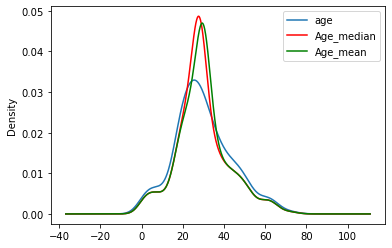

In [36]:
# We can see that the distribution has changed:
# there are now more values towards the median
# or median.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned previously, the mean / median imputation distorted the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

**Is this important?**

It depends on the machine learning model you want to build. Distorting the variable distribution may affect its relationship with the target, which might be important for linear models. Therefore, the final imputed variable might negatively affect the linear model's performance.

In [37]:
# We also said that mean / median imputation may affect the relationship 
# with the other variables in the dataset. 

# Let's have a look.

X_train[['fare', 'age', 'Age_median', 'Age_mean']].cov()

,fare,age,Age_median,Age_mean
fare,2199.947144,111.318279,93.569378,89.939797
age,111.318279,194.299260,194.299260,194.299260
Age_median,93.569378,194.299260,157.701547,157.094053
Age_mean,89.939797,194.299260,157.094053,157.105908


The covariance between Age and Fare changed with the mean / median imputation.

<AxesSubplot:>

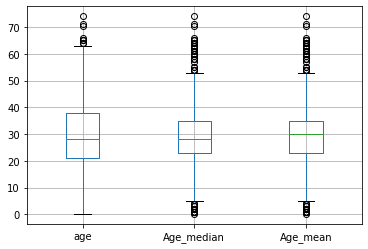

In [38]:
# Finally, I mentioned that mean / median imputation may lead 
# inliers to look like outliers.

# In other words, mean / median imputation may lead to an increase
# in the number of detected outliers.

# Let's find out using a boxplot.
X_train[['age', 'Age_median', 'Age_mean']].boxplot()

From the boxplot, we can see that after the imputation, we not only have more outliers at the higher age values, but we now have outliers as well at the lower age values.

**Is this important?**

If we are after true outliers, we need to keep this behavior in mind to make sure that we are neither masking nor creating artificial outliers with our imputation technique. In practice, we normally don't check for this behaviour at all. But I think it is important to know that it is happening.

## House Prices Dataset

In this dataset, there are variables with a lot or with a few missing data points. Therefore, we can compare the effects of mean and median imputation in both cases.

In [39]:
# We'll use the following variables,
# 3 of which contain NA.

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [40]:
# Let's load the House Prices dataset.

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [44]:
# print the variables with missing data.

# In the next list comprehension, I loop over all the columns
# of the dataset and select those with missing data.

cols_nan = [var for var in data.columns if data[var].isnull().sum() > 0]
cols_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [45]:
# Find the percentage of missing data in those variables
# (same code used in section 3).

data[cols_nan].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

**Remember that the mean and the median that we will use to replace the NA are calculated using  the train set.**

In [46]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data, data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 10), (438, 10))

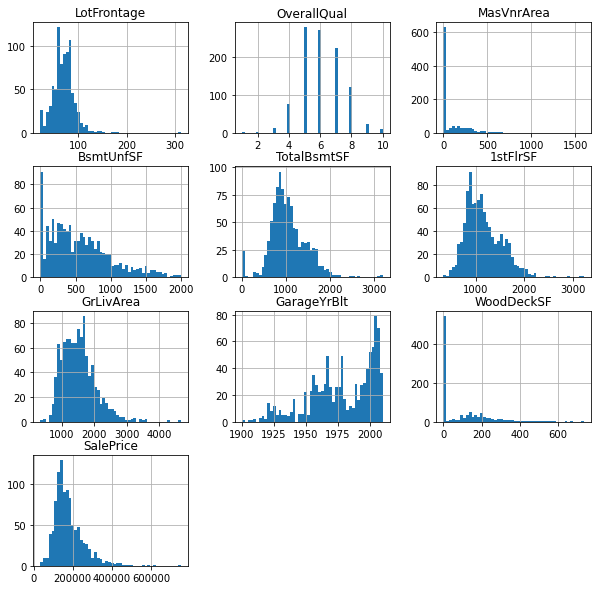

In [47]:
# Let's plot the distributions of the variables.
# We learned this code in section 3.

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [48]:
# Create a new variable with missing values replaced
# by the median using the function we created previously.

# I repeat the following lines for each of the variables with NA
# over the next cells.

median = X_train['LotFrontage'].median()

X_train['LotFrontage_median'] = X_train['LotFrontage'].fillna(median)
X_test['LotFrontage_median'] = X_test['LotFrontage'].fillna(median)

In [49]:
median = X_train['MasVnrArea'].median()

X_train['MasVnrArea_median'] = X_train['MasVnrArea'].fillna(median)
X_test['MasVnrArea_median'] = X_test['MasVnrArea'].fillna(median)

In [50]:
median = X_train['GarageYrBlt'].median()

X_train['GarageYrBlt_median'] = X_train['GarageYrBlt'].fillna(median)
X_test['GarageYrBlt_median'] = X_test['GarageYrBlt'].fillna(median)

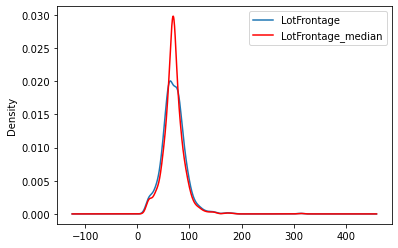

In [51]:
# Let's evaluate the effect of median imputation on the distribution.

# We can see that the distribution has changed for LotFrontAge,
# there are more values towards the median.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution.
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# Variable imputed with the median.
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')

# Add legends.
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

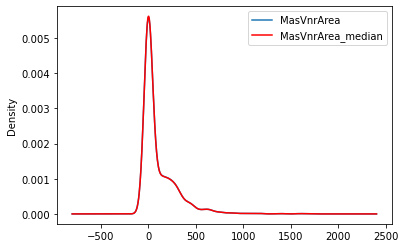

In [52]:
# For MasVnrArea, because the percentage of missing data
# was low, we don't expect and won't see a dramatic change in the
# distribution of the variable.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['MasVnrArea_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

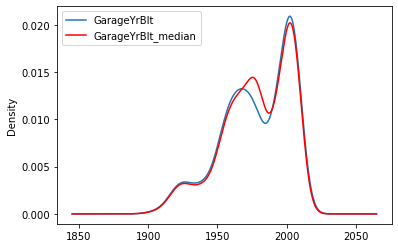

In [53]:
# Similarly, for GarageBlt, because the percentage of missing data
# was low, we don't expect a big change in the
# distribution. However, we see more values
# around the median.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['GarageYrBlt'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['GarageYrBlt_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [54]:
# We can also explore the effect of the imputation technique on 
# the variance.

# We can see a change in the variance after imputation of LotFrontAge.
# This is expected, because the percentage of missing data is quite
# high ~20%.

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Original Variance:  532.5872021885677
Variance after median imputation:  434.0660426541647


In [55]:
# This is not the case for MasnVnrArea, 
# because the % of missing data was small.

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after median imputation: ', X_train['MasVnrArea_median'].var())

Original Variance:  32983.53871003956
Variance after median imputation:  32874.27007404199


In [56]:
# For GarageBlt, the % of missing data was small, so the effect
# on the variance will also be small.

print('Original Variance: ', X_train['GarageYrBlt'].var())
print('Variance after median imputation: ', X_train['GarageYrBlt_median'].var())

Original Variance:  624.3059475074142
Variance after median imputation:  591.3356883144761


In [57]:
# Finally, let's explore the covariance:
# Take your time to compare the values in the table below.
# See how the covariance is affected for LotFrontAge but not
# so much for the other 2 variables.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.744233e+02,28.095264
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,5.384774,1.005330e+02,16.875386
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,553.921303,3.298354e+04,1134.380889
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,788.095358,7.472110e+03,1724.141544
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2370.929189,2.465436e+04,2989.473391
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,2750.747094,2.080136e+04,1890.271636
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3189.685753,3.496714e+04,2576.345636
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,24.755173,1.182673e+03,624.305948
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,106.009105,3.212101e+03,627.624634
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,544838.836893,6.790442e+06,877485.418108


<AxesSubplot:>

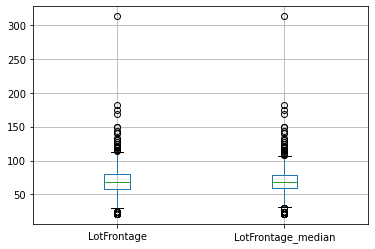

In [58]:
# Finally, let's explore the effect on outliers.

# There is a decrease in the outlier boundaries for LotFrontage
# (look at the height of the top whiskers),
# but there is not a visible effect for the other 2 variables.

X_train[['LotFrontage', 'LotFrontage_median']].boxplot()

<AxesSubplot:>

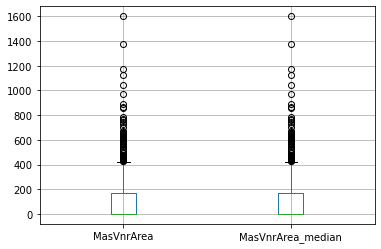

In [59]:
X_train[['MasVnrArea', 'MasVnrArea_median']].boxplot()

<AxesSubplot:>

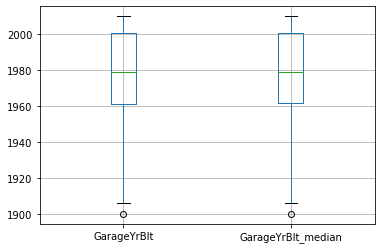

In [60]:
X_train[['GarageYrBlt', 'GarageYrBlt_median']].boxplot()

Later in this section, we will carry out mean / median imputation with open source Python packages.

<hr/>

## End of distribution imputation

In the previous notebook, we replaced missing data with an arbitrary value. However, choosing the value arbitrarily can be laborious and it is usually a manual job. By selecting arbitrary values at the end of the variable distribution, we can automate this operation. 

#### How do we select the value at the end?

- If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation

- If the variable is skewed, we can use the IQR proximity rule

We learned these techniques in section 3, in the lecture on "Outliers".

- We can also select the min/max value and multiply it by a factor, like 2 or 3.

### Which variables can I impute with an arbitrary value?

This method is suitable for numerical variables.

### Assumptions

- Data is not missing at random

If the value is not missing at random, we don't want to replace it with the mean or median and therefore make that observation look like the majority of the observations. Instead, we want to flag that observation, and therefore we assign a value at the tail of the distribution, which is not a common occurrence.

### Advantages

- Fast way of obtaining complete datasets

- Automates arbitrary value imputation

- Can be integrated into production (during model deployment)

- Highlights missing data

### Disadvantages

- Distortion of the original variable distribution

    - Distortion of the original variance

    - Distortion of the covariance with the remaining variables of the dataset

- This technique may mask true outliers in the distribution

### Final note

I haven't seen this method used in data competitions. However, this method is used in financial companies. When capturing the financial history of customers, the missing data is replaced by a value at the end of the distribution to highlight that the values are missing.

See my [talk at PyData London in 2017](https://www.youtube.com/watch?v=KHGGlozsRtA) as an illustration of feature engineering in finance.

## In this demo:

We will learn how to perform arbitrary value imputation using pandas on the Ames House Price and Titanic datasets.

- To download the datasets, please refer to the lecture **Datasets** in **Section 1** of this course.

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# to split the datasets
from sklearn.model_selection import train_test_split

In [62]:
# load the Titanic dataset with a few variables for demonstration

data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [63]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Imputation important

Imputation has to be done over the training set, and then propagated to the test set. For this imputation technique, this means that when selecting the value with which we will replace the NA, we need to do so only by looking at the distribution of the variables in the training set. Then we use the selected value to replace NA both in the train and test set.

In [64]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

<AxesSubplot:>

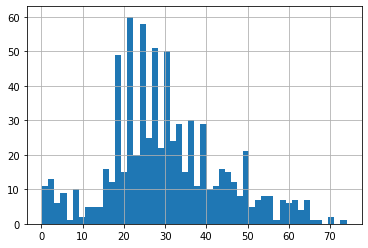

In [65]:
# let's have a look at the distribution of Ages
X_train.age.hist(bins=50)

In [66]:
# far end of the distribution:

# Because Age looks approximately Gaussian, I use the
# mean and std to calculate the replacement value

X_train.age.mean() + 3 * X_train.age.std()

72.03416424092518

In [67]:
# replace NA with the value calculated above

X_train['Age_imputed'] = X_train['age'].fillna(
    X_train.age.mean() + 3 * X_train.age.std())

X_train.head(15)

,age,fare,Age_imputed
501,13.0,19.5000,13.000000
588,4.0,23.0000,4.000000
402,30.0,13.8583,30.000000
1193,NaN,7.7250,72.034164
686,22.0,7.7250,22.000000
971,NaN,7.8792,72.034164
117,30.0,56.9292,30.000000
540,2.0,26.0000,2.000000
294,49.0,110.8833,49.000000
261,35.0,26.2875,35.000000


Look at the rows with missing data (NaN) in Age, and see how in the new variable they were replaced by 72.034.

In [68]:
# we can see a change in the variance after end of tail imputation
# this is expected, because the percentage of missing data is quite
# high in Age ~20%

print('Original variable variance: ', X_train['age'].var())
print('Variance after 99 imputation: ', X_train['Age_imputed'].var())

Original variable variance:  194.16304666581863
Variance after 99 imputation:  427.39198372523526


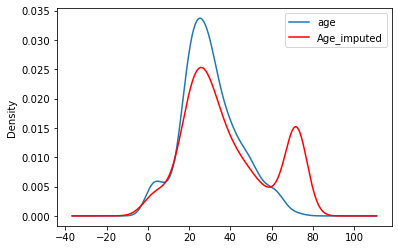

In [69]:
# we can see that the distribution has changed 
# with now more values accumulating towards the tail

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# imputed variable
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

End-of-tail imputation, like arbitrary value imputation, distorts the original distribution of the variable Age.The transformed variable shows more values around the selected tail value.

**Is this important?**

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. End of tail imputation may distort the original normal distribution if the percentage of missing data is high. Therefore, the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

On the other hand, this technique works quite well with tree-based algorithms.

In [10]:
# we also said end of tail imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

X_train[['fare', 'age', 'Age_imputed']].cov()

,fare,age,Age_imputed
fare,2248.326729,136.176223,19.647139
age,136.176223,194.163047,194.163047
Age_imputed,19.647139,194.163047,427.391984


We see indeed that the covariance between Age and Fare is changed after the arbitrary value imputation.

<AxesSubplot:>

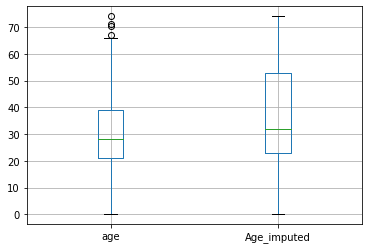

In [70]:
# Finally, I mentioned that end tail imputation may
# affect the perception of outliers

# Let's find out using a boxplot
X_train[['age', 'Age_imputed']].boxplot()

Masks the outliers!!

## House Prices Dataset

Let's repeat the exercise in the House Prices dataset. In this dataset, there are variables with a lot or few missing data. Therefore we can compare the effect of end tail imputation in both scenarios.

In [71]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [72]:
# let's load the House Prices dataset

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [73]:
# in the next list comprehension, I loop over all the columns 
# of the dataset and select those that contain missing data

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [74]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [75]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 10), (438, 10))

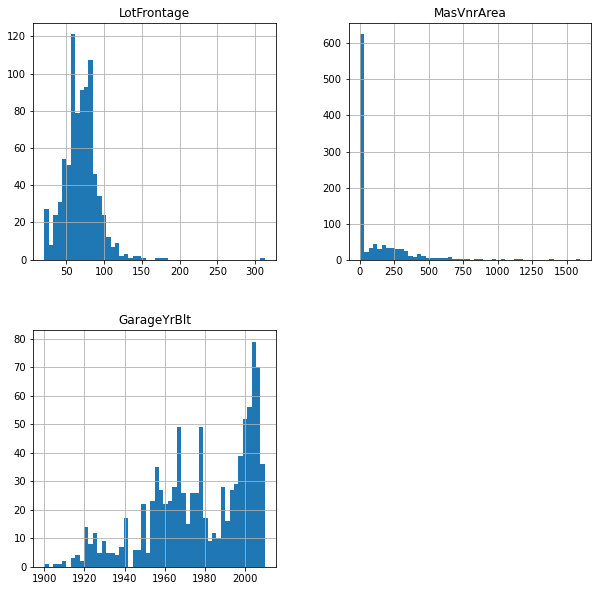

In [76]:
# let's plot the distributions of the variables
# we learnt this code in section 3 on variable characteristics

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].hist(bins=50, figsize=(10,10))
plt.show()

In [77]:
# the variables are not normally distributed

# let's impute the NA using the IQR proximity rule, which we learnt
# in the lecture on outliers in section 3

# calulate the IQR
IQR = X_train['LotFrontage'].quantile(0.75) - X_train['LotFrontage'].quantile(
    0.25)

# calculate the upper boundary
extreme_value = X_train['LotFrontage'].quantile(0.75) + 3 * IQR

extreme_value

146.0

In [78]:
# let's impute the NA with the extreme value

X_train['LotFrontage_imputed'] = X_train['LotFrontage'].fillna(extreme_value)
X_test['LotFrontage_imputed'] = X_test['LotFrontage'].fillna(extreme_value)

In [79]:
# let's do the same for MasVnrArea

# calculate the IQR
IQR = X_train['MasVnrArea'].quantile(0.75) - X_train['MasVnrArea'].quantile(
    0.25)

# calculate the upper boundary
extreme_value = X_train['MasVnrArea'].quantile(0.75) + 3 * IQR

extreme_value

680.0

In [80]:
# let's impute the NA with the extreme value

X_train['MasVnrArea_imputed'] = X_train['MasVnrArea'].fillna(extreme_value)
X_test['MasVnrArea_imputed'] = X_test['MasVnrArea'].fillna(extreme_value)

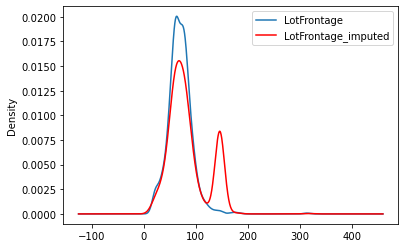

In [81]:
# let's evaluate the effect of end tail imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards the extreme value

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# imputed variable
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

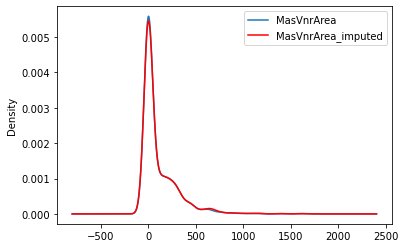

In [82]:
# let's evaluate the effect of arbitrary imputation on the distribution

# MasVnrArea had only few outliers, so the change in the distribution is
# not so dramatic. Less than when using an arbitrary value of 2999 as
# we did in the previous notebook

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# imputed variable
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

From the above plots we can see that the distribution of LotFrontAge is changed quite dramatically, but not so much the distribution of MasVnrArea. This is because the % of missing values in the second variable is quite small.

<AxesSubplot:>

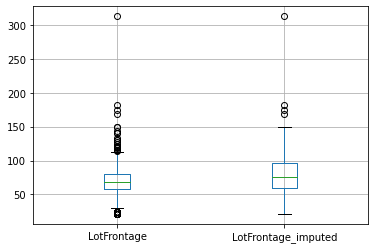

In [83]:
# we see that there are a fewer outliers as well after the imputation

X_train[['LotFrontage', 'LotFrontage_imputed']].boxplot()

<AxesSubplot:>

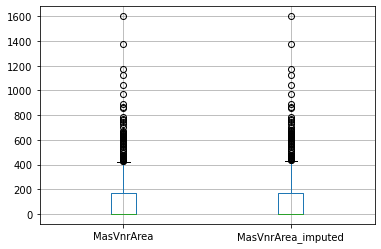

In [84]:
# however, the outliers are not so affected for MasVnrArea

X_train[['MasVnrArea', 'MasVnrArea_imputed']].boxplot()

In [85]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885677
Variance after imputation:  1313.0936747097642


In [86]:
# the same for MasnVnrArea is not so big
# Note particularly, that this effect is smaller than the one we observed
# when imputing by 2999 in the previous notebook!!!

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after imputation: ', X_train['MasVnrArea_imputed'].var())

Original Variance:  32983.53871003956
Variance after imputation:  34441.331260745486


In [87]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.934872e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,3.425501,1.035991e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,639.100679,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-850.739199,7.680598e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2308.792907,2.473980e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,3142.724647,2.055453e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3723.250100,3.541558e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,26.484608,1.274750e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,542.437312,3.088048e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,578446.035624,6.872641e+06


<hr/>

## Frequent category imputation | Mode imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Mode imputation consists of replacing all occurrences of missing values (NA) within a variable by the mode, which is the **most frequent value** or **most frequent category**.

### Which variables can I impute with the most frequent category?

Although the mode can be calculated for both numerical and categorical variables, in practice, we only use this method on categorical variables. The rationale for this is that for numerical variables, the mean or median tend to better represent the population's average value. 

### Assumptions

- Data is missing completely at random

If data is missing at random, the value for the missing observation will most likely look like the majority of the observations, that is, the most frequent category of the variable.

### Advantages

- Fast way of obtaining complete datasets

- Can be integrated into production (during model deployment)

### Limitations

If the fraction of NA is large:

- Distortion the relation of the most frequent category with other variables

- Over-representation of the most frequent category

### When to use mode / most frequent category imputation?

- Data is missing completely at random

- No more than 5% of the variables contain missing data

## In this demo:

We will use the House Prices dataset to demonstrate how to do mode imputation in categorical variables.

- To download the dataset please refer to the lecture **Datasets** in **Section 1** of the course.

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

### House Price dataset

In [89]:
# let's load the dataset with a few columns for the demonstration

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [90]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

The variable BsmtQual contains only a few observations with NA (2.5), therefore, replacing those observations with the value of the most frequent category is a good approach.

On the other hand, the variable FireplaceQu, contains missing data in almost half of the observations. Therefore, replacing those with the most frequent category is most likely going to distort the relationship of the most frequent category with the sale price. 

In addition, if so many observations in FireplaceQu are missing, it could be for a reason and not just at random, so we could be better off capturing that somehow with a different imputation technique. We will see how in the next notebook. For now, let's explore the effect of replacing NA by the most frequent categories when missing data is few or a lot.

### Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the most frequent category has to be selected from the training set, and used to replace NA both in train and test sets.

In [91]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # percentage of observations in the test set
    random_state=0) # seed for reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [92]:
# let's remind ourselves of the % of missing values
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

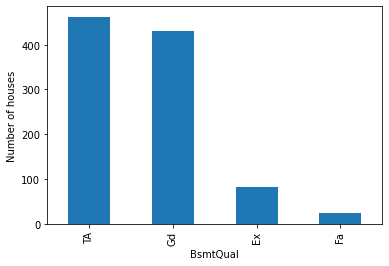

In [93]:
# let's inspect the number of observations per category in BsmtQual

# we used this line of code in section 3 on variable characteristics

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [94]:
# Let's find the most frequent category for BsmtQual

X_train['BsmtQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'BsmtQual')

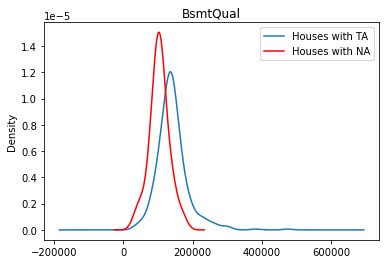

In [95]:
# let's plot the distribution of the target for the houses that:

# * show the most frequent category or
# * those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select and plot houses with the most frequent label
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# select and plot houses with missing data in the variable
X_train[X_train['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('BsmtQual')

The plot above indicates that the houses with missing data cost overall less than those with the label TA. Therefore, replacing missing values by TA, could affect the overall distribution, if there were a lot of NA.

In [96]:
# I keep the original distribution of SalePrice for the most
# frequent category for later

# the use of tmp is common to name temporal variables

tmp = X_train[X_train['BsmtQual']=='TA']['SalePrice']

In [97]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['BsmtQual'].fillna('TA', inplace=True)
X_test['BsmtQual'].fillna('TA', inplace=True)

In [98]:
# check that NA have been filled

X_train['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'Number of houses')

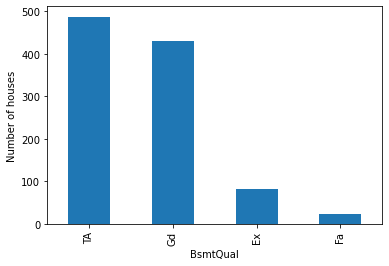

In [99]:
# evaluate effect on distribution of categories

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

From the plot, we see that now there are a few more houses with the label TA, which are those that before contained NA, but the overall effect on the distribution is not dramatic. The plot looks almost identical to the one before the imputation.

Text(0.5, 1.0, 'BsmtQual')

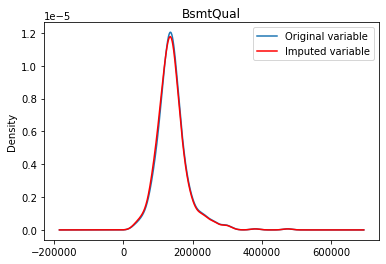

In [100]:
# did the distribution of SalePrice for the most frequent category change?
# let's have a look

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of salePrice for houses with most frequent label
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
X_train[X_train['BsmtQual'] == 'TA']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('BsmtQual')

The distribution of house prices between the original and imputed variable is quite similar, because the number of missing data was small. We expected this behaviour.

Let's explore the effect of mode imputation when the percentage of missing data is high.

#### FirePlaceQu

In [101]:
# let's remind ourselves of the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

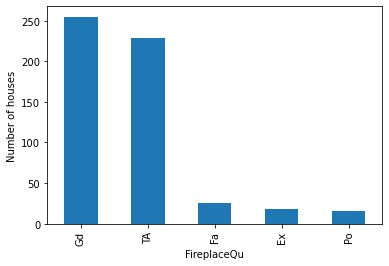

In [102]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [103]:
# Let's find the most frequent category for FirePlaceQu

X_train['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FirePlaceQu')

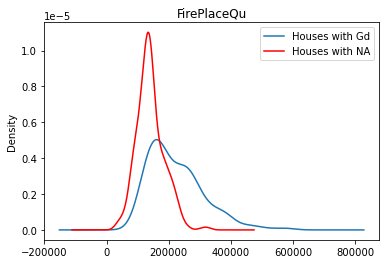

In [104]:
# let's plot the distribution of the target for the houses that
# show the most frequent category and those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# houses with the most frequent label for FirePlaceQu
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# houses with missing data in FirePlaceQu
X_train[X_train['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

The distributions are quite different, houses with missing data cost overall less than those with the label Gd.

In [105]:
# I keep the original distribution of SalePrice for houses
# that show Gd in FirePlaceQu, for later.

tmp = X_train[X_train['FireplaceQu']=='Gd']['SalePrice']

In [106]:
# Let's fill na in both train and test

X_train['FireplaceQu'].fillna('Gd', inplace=True)
X_test['FireplaceQu'].fillna('Gd', inplace=True)

Text(0, 0.5, 'Number of houses')

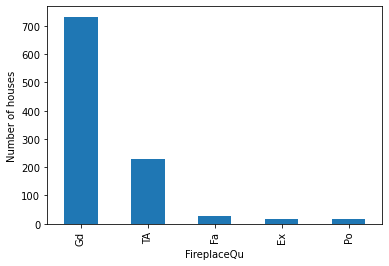

In [107]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In this case, we see a large distortion in the original distribution of the variable. Now we have a lot more houses that contain the variable Gd, compared to the houses that show the other variables. Originally, half of the observations in FirePlaceQu were missing. Now, all of those values contain Gd. That is why we observe a big increase in Gd in the bar plot. 

Text(0.5, 1.0, 'FirePlaceQu')

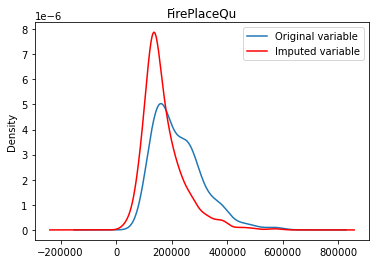

In [108]:
# let's plot the distribution of the target for the original variable
# fand the imputed variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of the variable
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
X_train[X_train['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

The average house value for the most frequent category has decreased quite dramatically after adding the house values of the NA, following the re-categorisation of NA as the most frequent label.

Thus, the importance of this particular label for the prediction of house prices is masked or changed by the addition of missing values. 

In cases like this, when the percentage of missing values is so high (50%), we are better off creating a new category to enclose the observations with NA. I will show this in the next lecture.

**That is all for this demonstration. In later sections I will show you how to do mode imputation with scikit-learn and feature engine as part of a machine learning pipeline.**

<hr/>

## Arbitrary value imputation for categorical variables

This is the most widely used method of missing data imputation for categorical variables. This method consists of treating missing data as an additional category of the variable. For example, all the missing observations are grouped under the newly created label, "Missing'.

This is, in essence, the equivalent of replacing numerical variables with an arbitrary value.

The beauty of this technique resides in the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data points is high.

### Advantages

- Fast way of obtaining complete datasets

- Can be integrated into production (during model deployment)

- Highlights missing data

- No assumption made on the data

### Limitations

- If the number of NA is small, creating an additional category may introduce noise

For categorical variables, this is the method of choice, as it treats missing values as a separate category, without making any assumptions about the variable or the reasons why data could be missing. It is widely used in data science competitions and organisations. See, for example, the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

## In this demo:

We will use the House Prices dataset to demonstrate how to do mode imputation in categorical variables.

- To download the dataset please refer to the lecture **Datasets** in **Section 1** of the course.

In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

### House Prices dataset

In [110]:
# let's load the dataset with a few columns for the demonstration

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [111]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

When replacing NA in categorical variables with a label called 'Missing', we are not learning anything from the training set, so in principle, we could do this in the original dataset and then separate it into train and test. However, I do not recommend this practice. You will see in later notebooks that splitting into train and test right at the beginning helps with building a machine learning pipeline. So I will continue with this practice here as well.

In [112]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [113]:
# let's remind ourselves of the % of missing values
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

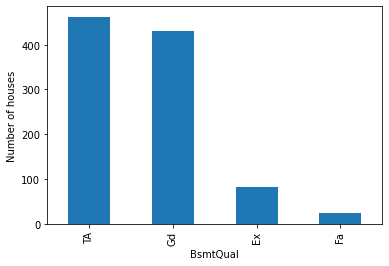

In [114]:
# let's inspect the number of observations per category in BsmtQual

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [115]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

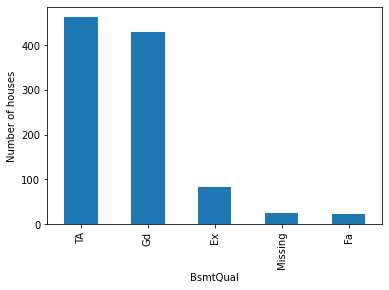

In [116]:
# let's plot the number of houses per category in the imputed variable

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

We see now the additional category with the missing data: Missing

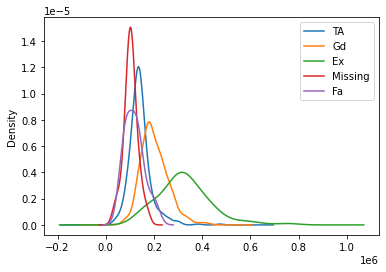

In [117]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

You can see that the houses with different labels show different distributions of prices. For example, the houses with the label "Ex" tend to be the most expensive, whereas the houses that show "Missing" or "Fa" are the cheapest.

#### FirePlaceQu

In [118]:
# let's remind ourselves of the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

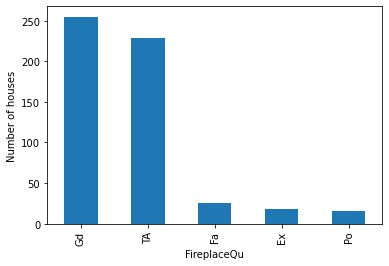

In [119]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [120]:
# Let's fill na in both train and test

X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

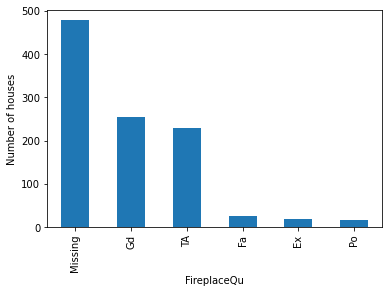

In [121]:
# let's inspect the number of observations per category
# in the imputed variable

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

We see now the additional category with the missing data: Missing

This label contains most of the houses, as most showed missing data originally.

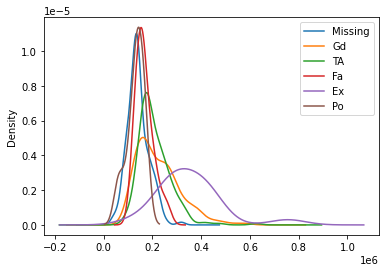

In [122]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind='kde', ax=ax)


# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

We observe again that the houses with different labels for FirePlaceQu also show different distributions of sale price, with those showing Ex being the most expensive ones and those showing Missing, or Fa, being the cheapest ones.

**That is all for this demonstration. In later notebooks, I will show you how to automate this with Scikit=learn and Feature-engine**

In [123]:
# BONUS: in case you need the plot for your analysis:
# here is a way of making it more general


def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        

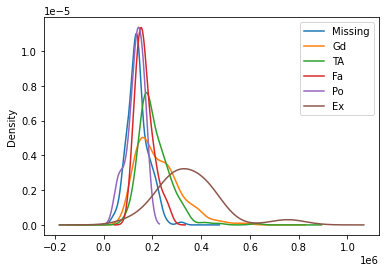

In [124]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

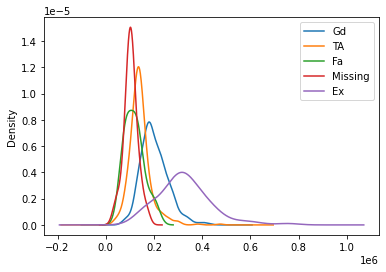

In [125]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

<hr/>

## Random sample imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can then be used for machine learning.

Random sampling imputation is in principle similar to mean, median, and mode imputation in that it considers that missing values, should look like those already existing in the distribution.

Random sampling consists of taking random observations from the pool of available data and using them to replace the NA. In random sample imputation, we take as many random observations as missing values exist in the variable.

In both numerical and categorical variables, the distribution of the variable is preserved by sampling observations at random to replace missing data. 

### Which variables can I impute by random sample imputation?

Random Sample Imputation can be applied to both numerical and categorical variables.

### Assumptions

Random sample imputation assumes that the data is missing completely at random. In this scenario, it makes sense to substitute the missing values with values extracted at random from the original distribution. 

From a probabilistic point of view, values that are more frequent, like the mean or the median or the most frequent category, will be selected more often -because there are more of them to select from-, but less frequent values will be selected as well. Thus, the distribution of the variables is preserved. 

In essence, we replace a population of missing values with a population of values with the same distribution of the original variable.

### Advantages

- Preserves the variable distribution

### Limitations

- Randomness

- The relationship of imputed variables with other variables may be affected if there are a lot of NA

- Computationally more expensive than previous methods

- Memory heavy for deployment, as we need to store the original training set, to extract values to replace the NA.

### When to use Random Sample Imputation?

- Data is missing completely at random

- No more than 5% of the variables contain missing data.

- Well suited for linear models as it does not distort the distribution, regardless of the percenage of NA

If used in combination with missing indicators, then this method can be used when data is not missing at random, or when there are many missing observations.

#### Randomness

Randomness may not seem much of a concern when replacing missing values for data competitions, where the whole batch of missing values is replaced once, and then the dataset is scored and that is the end of the problem. However, in business scenarios, the situation is very different. 

Imagine, for example, a car manufacturer is trying to predict how long a certain car will be in the garage before it passes all the security tests. Today, they received a car with missing data in some of the variables. They ran the machine learning model to predict how long this car would stay in the garage. The model replaces missing values by a random sample and then produces an estimate of time. Tomorrow, when they run the same model on the same car, the model will randomly assign values to the missing data that may or may not be the same as the ones it selected today. Therefore, the final estimation of time in the garage, may or may not be the same as the one obtained the day before.

In addition, imagine the car manufacturer evaluating two different cars that have exactly the same values for all of the variables, and missing values in exactly the same subset of variables. They run the machine learning model for each car, and because the missing data is randomly filled with values, the 2 cars, that are exactly the same, may end up with different estimates of time in the garage.

This may sound completely trivial and unimportant. However, businesses must certain regulations, and some of them require the same treatment to be provided in the same situation. So if instead of cars, these were people applying for a loan, or people seeking disease treatment, the machine learning model would provide different solutions to candidates that are in the same conditions. And this is not fair or acceptable. This behavior needs to be avoided.

#### So, should we randomly replace NA or not?

It is still possible to replace missing data by random sample, but this randomness needs to be controlled, so that individuals in the same situation end up with the same scores and, therefore, with the same solutions offered. How can we ensure this? by appropriately setting seeds during the random extraction of values.

Finally, a disadvantage of random sampling, similar to the use of the mean and median, is that estimations of covariance and correlations with other variables in the dataset may be distorted, especially if there are many missing observations. 

### Final note

Replacement of missing values by a random sample, although similar in concept to replacement by the median or mean, is not as widely used in the data science community as the mean/median imputation, presumably because of the element of randomness, or because the code implementation is not so straightforward.

However, it is a valid approach, with clear advantages over mean or median imputation, as it preserves the distribution of the variable. And, especially for linear models, if you are aware of the element of randomness and account for it in some way, this may be the approach of choice. 

## In this demo:

We will learn how to perform random sample imputation using pandas on the Ames House Price and Titanic datasets.

- To download the datasets, please refer to the lecture **Datasets** in **Section 1** of this course.

In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split and standarise the datasets
from sklearn.model_selection import train_test_split

## Random Sampling for Numerical Variables

In [127]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [128]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Imputation important

Imputation should done over the training set, and then propagated to the test set. This means that the random sample to be used to fill missing values both in train and test set, should be extracted from the train set.

In [129]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.survived,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [132]:
# let's impute Age by random sampling both in
# train and test sets

# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train['Age_imputed'] = X_train['age'].copy()
X_test['Age_imputed'] = X_test['age'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['age'].dropna().sample(
    X_train['age'].isnull().sum(), random_state=0)

random_sample_test = X_train['age'].dropna().sample(
    X_test['age'].isnull().sum(), random_state=0)

# what is all of the above code doing?

# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['Age'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['age'].isnull()].index
random_sample_test.index = X_test[X_test['age'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['age'].isnull(), 'Age_imputed'] = random_sample_train
X_test.loc[X_test['age'].isnull(), 'Age_imputed'] = random_sample_test

In [133]:
# check that NA were imputed
X_train['Age_imputed'].isnull().sum()

0

In [134]:
# check that NA were imputed
X_test['Age_imputed'].isnull().sum()

0

In [135]:
X_train.head(15)

,survived,age,fare,Age_imputed
501,1,13.0,19.5000,13.0
588,1,4.0,23.0000,4.0
402,1,30.0,13.8583,30.0
1193,0,NaN,7.7250,40.5
686,1,22.0,7.7250,22.0
971,0,NaN,7.8792,39.0
117,1,30.0,56.9292,30.0
540,1,2.0,26.0000,2.0
294,0,49.0,110.8833,49.0
261,1,35.0,26.2875,35.0


We can see how NAs are replaced by different values in the different rows! This is what we wanted.

#### Random sampling preserves the original distribution of the variable

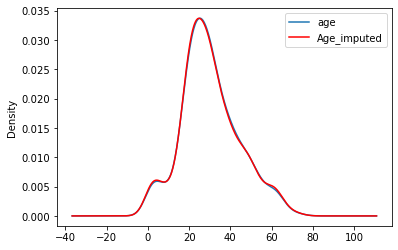

In [136]:
# we can see that the distribution of the variable after
# random sample imputation is almost exactly the same as the original

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['age'].plot(kind='kde', ax=ax)
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

We can see that replacing missing values with a random sample from the training set preserves the original distribution of the variable. If you remember from previous notebooks, every other imputation technique altered the distribution of Age, because the percentage of NA in Age is high, ~20%. However, random sample imputation preserves the distribution, even in those cases. So this imputation technique is quite handy, if we are building linear models and we don't want to distort normal distributions.

In [137]:
# there is some change in the variance of the variable.
# however this change is much smaller compared to mean or median
# imputation (check the previous notebook for comparison)

print('Original variable variance: ', X_train['age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  194.16304666581863
Variance after random imputation:  198.53703762759557


In [138]:
# the covariance of Age with Fare is also less affected by this
# imputation technique compared to mean or median imputation

X_train[['fare', 'age', 'Age_imputed']].cov()

,fare,age,Age_imputed
fare,2248.326729,136.176223,100.938070
age,136.176223,194.163047,194.163047
Age_imputed,100.938070,194.163047,198.537038


<AxesSubplot:>

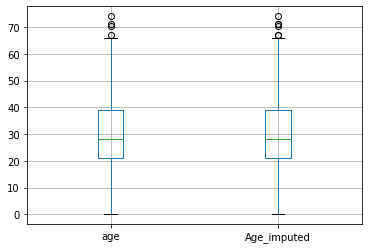

In [139]:
# Finally, the outliers are also less affected by this imputation
# technique

# Let's find out using a boxplot
X_train[['age', 'Age_imputed']].boxplot()

So, random sample imputation offers all the advantages provided by the preservation of the original distribution. And that is a big plus, particularly, if you care about distribution and outliers for your machine learning models. This is particularly relevant for linear models. but not so important for tree based algorithms.

## Randomness can lead to different scores being assigned to the same observation

Let's examine the effect of randomness on multiple scoring, and how we can mitigate this behaviour, as this is very important when putting our models in production / integrating our models with live systems.

In [140]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 15

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [141]:
# and now let's fill that NA with a random value
# extracted from the same variable where observations are available

# extract a random value, just 1
sampled_value = X_train['age'].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,22.0


In [142]:
# let's repeat the exercise again: 
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train['age'].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  #pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,59.0


In [143]:
# and again
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train['age'].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  #pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,28.0


We can see that every time we repeat the operation, we get a different value replacement for exactly the same observation. In fact, if we repeat the process 1000 times:

Text(0, 0.5, 'Number of times')

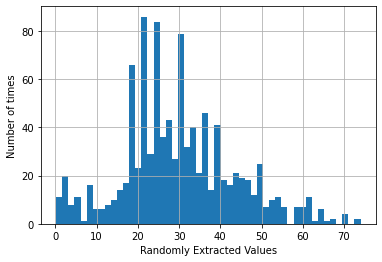

In [144]:
# if we repeat the process 1000 times:

values_ls = []

# capture the non-Na values to speed
# the computation
tmp = X_train.age.dropna()

for i in range(1000):
    
    # extract a random value, just 1
    sampled_value = tmp.sample(1).values
    
    # add the extracted value to the list
    values_ls.append(float(sampled_value))
    
pd.Series(values_ls).hist(bins=50)
plt.xlabel('Randomly Extracted Values')
plt.ylabel('Number of times')

We obtain very different values for the same observation. Note how the distribution of extracted values is similar to the distribution of age.

If these were patients looking for treatment, every time we ran a predictive model, which would operate on the differently randomly extracted values, we would assign patients with the same characteristics to different treatments, and this is not OK.

### How can we fix this behaviour?

We can fix this randomness by assigning a seed:

In [145]:
values_ls = []

for i in range(100):

    # extract a random value, just 1, now with seed
    sampled_value = X_train.age.dropna().sample(1, random_state=10)

    # add random value to the list
    values_ls.append(float(sampled_value))

# print the values
pd.Series(values_ls).unique()

array([23.5])

In [146]:
values_ls

[23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5]

Now that we set the seed, every randomly extracted value for that observation is the same.

However, if we set the same seed for every single observation, what would happen is that for every different observation, we would be filling the NA with exactly the same value (same seed == same random value extracted). This would be the equivalent to arbitrary value imputation!!!

We don't want that behaviour either.

Therefore, we want our seed to change observation per observation, but in a controlled manner, so that 2 observations that are exactly the same, receive the same imputed random values. But 2 observations that are different, receive different imputed random values.

### Controlling the element of randomness by varying the seed

We can attribute a different seed to each observation, and in fact, we can make this seed depend on an alternative variable of the same observation, thus, thinking in the Titanic dataset, if 2 passengers paid exactly the same Fare, they would get exactly the same probability of survival (when Age is missing).

In [147]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 15

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [148]:
# the seed is now the Fare

int(observation.fare)

25

In [149]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.age.dropna().sample(
    1, random_state=int(observation.fare))

sampled_value.index = [15]

observation['Age_random'] = sampled_value
observation

,survived,age,fare,Age_random
15,0,NaN,25.925,44.0


In [150]:
# for a different observation with a different Fare,
# we would get a different randomly extracted value

observation = data[data.age.isnull()].tail(1)

observation

,survived,age,fare
1305,0,NaN,14.4542


In [151]:
# new seed
int(observation.fare)

14

In [152]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.age.dropna().sample(
    1, random_state=int(observation.fare))

sampled_value.index = [1305]

observation['Age_random'] = sampled_value
observation

,survived,age,fare,Age_random
1305,0,NaN,14.4542,40.0


This is a way of controlling the randomness. Using the fare to set the random state, you guarantee that for 2 passengers with an equal fare, the age will be replaced with the same number, and therefore, the 2 passengers will get the same probability of survival.

### Note!!

In real life, you will build models that use tens of variables or more. So, in cases like that, you can think of picking the 3-5 most important variables, those that have the strongest impact on the output of the machine learning model, and combining them to create the random state. Therefore, customers that share the 3-5 main variable values, will get the same scores.

## Random Sampling for Categorical Variables

In [153]:
# let's load the dataset with a few columns for the demonstration
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)

# let's inspect the percentage of missing values in each variable
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
FireplaceQu    0.472603
dtype: float64

In [154]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [155]:
# let's impute BsmtQual by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train['BsmtQual_imputed'] = X_train['BsmtQual'].copy()
X_test['BsmtQual_imputed'] = X_test['BsmtQual'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['BsmtQual'].dropna().sample(
    X_train['BsmtQual'].isnull().sum(), random_state=0)

random_sample_test = X_train['BsmtQual'].dropna().sample(
    X_test['BsmtQual'].isnull().sum(), random_state=0)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['BsmtQual'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['BsmtQual'].isnull()].index
random_sample_test.index = X_test[X_test['BsmtQual'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_train
X_test.loc[X_test['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_test

In [156]:
# let's impute FireplaceQu by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu'].copy()
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['FireplaceQu'].dropna().sample(
    X_train['FireplaceQu'].isnull().sum(), random_state=0)

random_sample_test = X_train['FireplaceQu'].dropna().sample(
    X_test['FireplaceQu'].isnull().sum(), random_state=0)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['FireplaceQu'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['FireplaceQu'].isnull()].index
random_sample_test.index = X_test[X_test['FireplaceQu'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_train
X_test.loc[X_test['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_test

In [157]:
# check that nulls were removed
X_train['FireplaceQu_imputed'].isnull().sum()

0

In [158]:
# and now let's evaluate the effect of the imputation on the distribution
# of the categories and the target within those categories

# we used a similar function in the notebook of arbitrary value imputation
# for categorical variables

def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # percentage of observations per category, original variable
            df[variable_original].value_counts() / len(df[variable_original].dropna()),

            # percentage of observations per category, imputed variable
            df[variable_imputed].value_counts() / len(df)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'imputed']

    return tmp

In [159]:
# run the function in a categorical variable
categorical_distribution(X_train, 'BsmtQual', 'BsmtQual_imputed')

,original,imputed
TA,0.463928,0.465753
Gd,0.430862,0.428571
Ex,0.082164,0.083170
Fa,0.023046,0.022505


In [160]:
# run the function in a categorical variable
categorical_distribution(X_train, 'FireplaceQu', 'FireplaceQu_imputed')

,original,imputed
Gd,0.468750,0.469667
TA,0.420956,0.420744
Fa,0.047794,0.046967
Ex,0.033088,0.032290
Po,0.029412,0.030333


As expected, the percentage of observations within each category is very similar in the original and imputed variables, for both BsmtQual where NA is low and FireplaceQu where NA is high.

In [161]:
# now let's look at the distribution of the target within each
# variable category

def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].dropna().unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].dropna().unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()

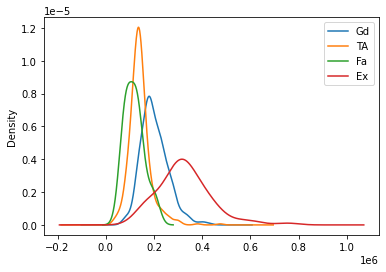

In [162]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

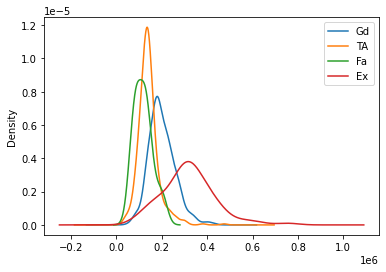

In [163]:
automate_plot(X_train, 'BsmtQual_imputed', 'SalePrice')

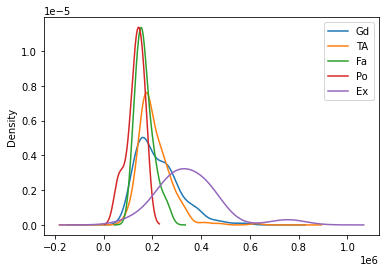

In [164]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

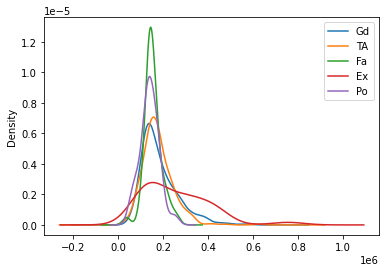

In [165]:
automate_plot(X_train, 'FireplaceQu_imputed', 'SalePrice')

For BsmtQual, where the NA is low, the distribution of the target is preserved for the categories in the original and imputed variable. The distribution of the target per category is slightly modified in FireplaceQu, which has more NAs. 

## Note on Random Sample Imputation code

The code provided in this notebook for random sampling is a bit complex. Don't worry! You can do random sample imputation using the package Feature-engine in just a couple of lines. I will show you how in a coming notebook.


<hr/>

## Adding a variable to capture NA

In previous notebooks, we learned how to replace missing values by the mean, median, or by extracting a random value.  These methods assume that the data is missing completely at random (MCAR).

There are other methods that can be used when values are not missing at random, for example, arbitrary value imputation or end of distribution imputation. However, these imputation techniques will affect the variable distribution quite dramatically, and they are therefore not suitable for linear models.

**So what can we do if the data is not MCAR and we want to use linear models? **

If data are not missing at random, it is a good idea to replace missing observations with the mean, median, or mode while **flagging** them with a **Missing Indicator**.A missing indicator is a binary variable that indicates whether the data was missing (1) or not (0).

### For which variables can I add a missing indicator?

We can add a missing indicator to both numerical and categorical variables. 

#### Note

Adding a missing indicator is never used alone. On the contrary, it is always used together with another imputation technique, which can be mean / median imputation for numerical variables, or frequent category imputation for categorical variables. For both categorical and numerical variables, we can combine random sample imputation with the addition of a missing indicator.

Commonly used together:

- Mean/median imputation + missing indicator (Numerical variables)

- Frequent category imputation + missing indicator (categorical variables)

- Random sample imputation + missing indicator (numerical and categorical)

### Assumptions

- Data is not missing at random

- Missing data is predictive

### Advantages

- Captures the importance of missing data if there is one

### Limitations

- Expands the feature space

Adding a missing indicator will increase the number of variables in the dataset. So if the dataset contains 10 features, and all of them have missing values, after adding a missing indicator, we will have a dataset with 20 features: the original 10 features plus an additional 10 binary features, which indicate for each of the original variables whether they were missing or not. This may not be a problem in datasets with tens to a few hundred variables, but if our original dataset contains thousands of variables, by creating an additional variable to indicate NA, we will end up with very big datasets. 

In addition, data tends to be missing across multiple variables, which often leads to many of the missing indicators being similar to or even identical to each other.

### Final note

Typically, mean / median / mode imputation is done together with adding a variable to capture those observations where the data was missing, thus covering 2 angles: if the data was missing completely at random, this would be contemplated by the mean / median / mode imputation, and if it wasn't, this would be captured by the missing indicator.

These methods combined are the top choice in data science competitions. See, for example, the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection](http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

## In this demo:

We will use the Ames House Price and Titanic datasets.

- To download the datasets, please refer to the lecture **Datasets** in **Section 1** of this course.

In [166]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [167]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [168]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

To add a binary missing indicator, we don't necessarily need to learn anything from the training set, so in principle, we could do this in the original dataset and then separate it into train and test. However, I do not recommend this practice.

In addition, if you are using Scikit-learn to add the missing indicator, the indicator needs to learn from the train set, which features to impute, that is, which are the features for which the binary variable needs to be added. We will see more about different implementations of missing indicators in future notebooks. For now, let's see how to create a binary missing indicator manually.

In [169]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [170]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [171]:
# add the missing indicator

# this is done very simply by using np.where from numpy
# and isnull from pandas:

X_train['Age_NA'] = np.where(X_train['age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['age'].isnull(), 1, 0)

X_train.head()

,age,fare,Age_NA
501,13.0,19.5000,0
588,4.0,23.0000,0
402,30.0,13.8583,0
1193,NaN,7.7250,1
686,22.0,7.7250,0


In [172]:
# the mean of the binary variable, coincides with the 
# perentage of missing values in the original variable

X_train['Age_NA'].mean()

0.19104803493449782

In [173]:
# yet the original variable, still shows the missing values
# which need to be replaced by any of the techniques
# we have learnt

X_train.isnull().mean()

age       0.191048
fare      0.000000
Age_NA    0.000000
dtype: float64

In [174]:
# for example median imputation

median = X_train['age'].median()

X_train['age'] = X_train['age'].fillna(median)
X_test['age'] = X_test['age'].fillna(median)

# check that there are no more missing values
X_train.isnull().mean()

age       0.0
fare      0.0
Age_NA    0.0
dtype: float64

### House Prices dataset

In [175]:
# we are going to use the following variables,
# some are categorical some are numerical

cols_to_use = [
    'LotFrontage', 'MasVnrArea', # numerical
    'BsmtQual', 'FireplaceQu', # categorical
    'SalePrice' # target
]

In [177]:
# let's load the House Prices dataset

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 5)


,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,SalePrice
0,65.0,196.0,Gd,NaN,208500
1,80.0,0.0,Gd,TA,181500
2,68.0,162.0,Gd,TA,223500
3,60.0,0.0,TA,Gd,140000
4,84.0,350.0,Gd,TA,250000


In [178]:
# let's inspect the variables with missing values

data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [179]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [180]:
# Let's create a list with the name
# of the new variables

indicators = [f"{var}_NA" for var in cols_to_use]

In [183]:
# Let's add the indicators
X_train[indicators] = X_train[cols_to_use].isna().astype(int)
X_test[indicators] = X_test[cols_to_use].isna().astype(int)

In [184]:
# Let's explore the first rows

X_train.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,SalePrice,LotFrontage_NA,MasVnrArea_NA,BsmtQual_NA,FireplaceQu_NA,SalePrice_NA
64,NaN,573.0,Gd,NaN,219500,1,0,0,1,0
682,NaN,0.0,Gd,Gd,173000,1,0,0,0,0
960,50.0,0.0,TA,NaN,116500,0,0,0,1,0
1384,60.0,0.0,TA,NaN,105000,0,0,0,1,0
1100,60.0,0.0,TA,NaN,60000,0,0,0,1,0


In [185]:
# now let's evaluate the mean value of the missing indicators

# calculate the mean:

X_train[indicators].mean()

LotFrontage_NA    0.184932
MasVnrArea_NA     0.004892
BsmtQual_NA       0.023483
FireplaceQu_NA    0.467710
SalePrice_NA      0.000000
dtype: float64

In [186]:
# the mean of the missing indicator
# coincides with the percentage of missing values
# in the original variable

X_train.isnull().mean()

LotFrontage       0.184932
MasVnrArea        0.004892
BsmtQual          0.023483
FireplaceQu       0.467710
SalePrice         0.000000
LotFrontage_NA    0.000000
MasVnrArea_NA     0.000000
BsmtQual_NA       0.000000
FireplaceQu_NA    0.000000
SalePrice_NA      0.000000
dtype: float64

In [187]:
# let's impute the NA with  the median for numerical
# variables
# remember that we calculate the median using the train set

median = X_train['LotFrontage'].median()
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(median)
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(median)

median = X_train['MasVnrArea'].median()
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(median)
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(median)


# let's impute the NA in categorical variables by the 
# most frequent category (aka the mode)
# the mode needs to be learnt from the train set

mode = X_train['BsmtQual'].mode()[0]
X_train['BsmtQual'] = X_train['BsmtQual'].fillna(mode)
X_test['BsmtQual'] = X_test['BsmtQual'].fillna(mode)

mode = X_train['FireplaceQu'].mode()[0]
X_train['FireplaceQu'] = X_train['FireplaceQu'].fillna(mode)
X_test['FireplaceQu'] = X_test['FireplaceQu'].fillna(mode)

In [188]:
# and now let's check there are no more NA
X_train.isnull().mean()

LotFrontage       0.0
MasVnrArea        0.0
BsmtQual          0.0
FireplaceQu       0.0
SalePrice         0.0
LotFrontage_NA    0.0
MasVnrArea_NA     0.0
BsmtQual_NA       0.0
FireplaceQu_NA    0.0
SalePrice_NA      0.0
dtype: float64

As you can see, we have now the double of features respect to the original dataset. The original dataset had 4 variables, the pre-processed dataset contains 8, plus the target.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

<hr/>

## Mean / median imputation with Scikit-learn ==> SimpleImputer

Scikit-learn provides a class to perform the most common data imputation techniques.

The **SimpleImputer** provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

### Advantages

- Simple to use if applied to the entire dataframe
- Maintained by the Scikit-learn developers: good quality code
- Fast computation (it uses numpy for calculations)
- Allows for grid search over the various imputation techniques
- Imputes several types of values (you can indicate if the missing values are np.nan, or zeroes, etc)

### Limitations

- Returns a numpy array instead of a pandas dataframe, inconvenient for data analysis
- Needs to use additional classes to select which features to impute  ==>
    - requires more lines of code
    - not so straightforward to use anymore.

### More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## In this demo:

We will do **mean / median imputation with Scikit-learn** using the Ames House Price Dataset.

- To download the dataset please refer to the lecture **Datasets** in **Section 1** of this course.

In [189]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the classes that we need to impute 
# missing data with sklearn:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

In [190]:
# We use only the following variables for the demo,
# 3 of which contain NA:

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [191]:
# let's load the House Prices dataset

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [192]:
# let's check the fraction of null values
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [193]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0, # for reproducibility
)  

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [194]:
# let's check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer on the entire dataset

In [195]:
# Now we impute the missing values with SimpleImputer.

# Create an instance of the simple imputer.
# We indicate that we want to impute with the median.
imputer = SimpleImputer(strategy='median')

# We fit the imputer to the train set.
# The imputer will learn the median of all variables.
imputer.fit(X_train[cols_to_use])

SimpleImputer(strategy='median')

**Note, if you want to do mean imputation instead of median, pass the argument 'mean' to 'strategy'**

In [196]:
# We can look at the learnt medians like this:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [197]:
# And we can investigate the medians directly to corroborate
# the imputer did a good job:
X_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

**Note** that SimpleImputer learns the medians of ALL the variables in the dataset, those with NA and those without NA.

In [198]:
# Now we impute the train and test sets.

# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [199]:
# If we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


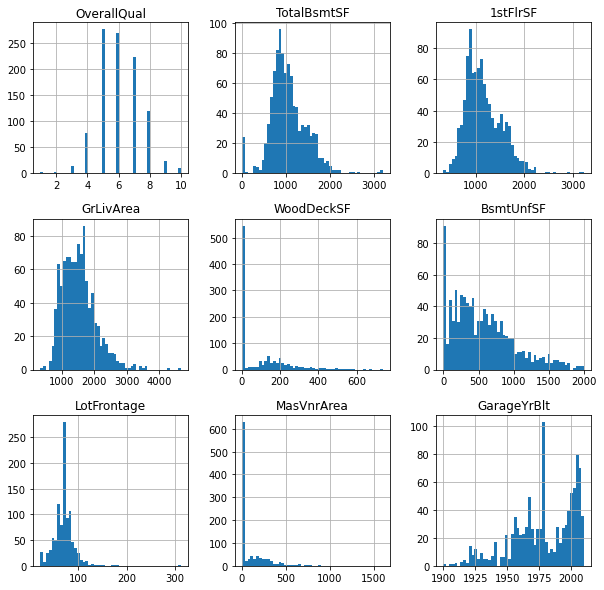

In [200]:
# Let's explore the change in the distributions after the median imputation

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

The tall bar at the value of the median in the histogram occurs after the data imputation in the variable LotFrontAge.

**A MASSIVE NOTE OF CAUTION**: when encoding the returned numpy arrays from Scikit-learn back to a dataframe, there is the potential risk of messing the order of the features and therefore MISS-REPRESENTING the data!!

You need to be extremely careful to pass the columns to the pd.DataFrame command in the same order in which they were in the X_train BEFORE the transformation!.


### SimpleImputer: different imputations for different features

Sometimes, we want to implement different imputation techniques to different features. How can we do this using the SimpleImputer?

We need to use another class called [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

In [220]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # predictors only
    data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [221]:
# let's look at the missing values
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

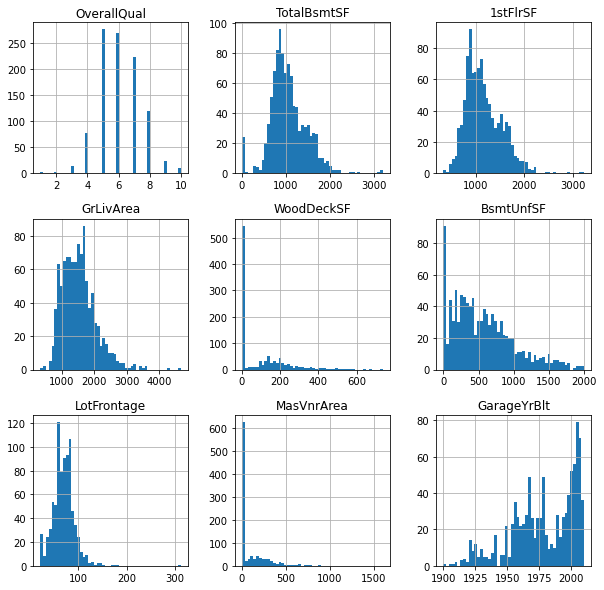

In [222]:
# let's look at the distributions of the variables to decide
# whether we use the mean or the median

X_train.hist(bins=50, figsize=(10,10))
plt.show()

For this demo, I will impute LotFrontage with the mean, and MasVnrArea and GarageYrBlt with the median, as those variables are quite skewed.

In [223]:
# First we need to make lists, indicating which features
# will be imputed with each method.

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

# Then we pass the features list and the transformers to
# the column transformer.

# We need to add remainder = True to indicate what we want
# ALL the columns returned at the end of the transformation
# and not just the engineered ones, which is the default
# behaviour of ColumnTransformer.

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', SimpleImputer(strategy='mean'), numeric_features_mean),
    ('median_imputer', SimpleImputer(strategy='median'), numeric_features_median)
], remainder='passthrough')

In [224]:
# Now we fit the preprocessor:

preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

In [225]:
# We can explore the imputers like this:

preprocessor.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

In [226]:
# And we can look at the parameters learned 
# by the imptuers like this:

# for the mean imputer:
preprocessor.named_transformers_['mean_imputer'].statistics_

array([69.66866747])

In [227]:
# and we can corroborate the value with the one obtained
# manually from the train set.

X_train[numeric_features_mean].mean()

LotFrontage    69.668667
dtype: float64

In [228]:
# The median imputer learned 2 median values
# because we wanted to impute 2 different variables.

preprocessor.named_transformers_['median_imputer'].statistics_

array([   0., 1979.])

In [229]:
# We corroborate those values in the train set:

X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [230]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)

# and check that it worked
np.mean(np.isnan(X_train))

0.0

In [231]:
# and now we can impute the test set
X_test = preprocessor.transform(X_test)

# and check that it worked
np.mean(np.isnan(X_test))

0.0

In [232]:
# remember that the returned data is a NumPy array:

X_train

array([[  69.66866747,  573.        , 1998.        , ..., 2034.        ,
         576.        ,  318.        ],
       [  69.66866747,    0.        , 1996.        , ..., 1291.        ,
         307.        ,  288.        ],
       [  50.        ,    0.        , 1979.        , ...,  858.        ,
         117.        ,  162.        ],
       ...,
       [  68.        ,    0.        , 1978.        , ..., 1902.        ,
           0.        ,    0.        ],
       [  69.66866747,   18.        , 2003.        , ..., 1557.        ,
         143.        , 1374.        ],
       [  58.        ,   30.        , 1998.        , ..., 1839.        ,
           0.        , 1195.        ]])

In [233]:
# iIf we want to convert the array into a dataframe, we need
# to be careful with the column order.

# We can explore the features used by each transformer
# including those in the remainder (the ones that were not transformed):

preprocessor.transformers_

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

We know that the first transformer imputed LotFrontage. That will be the first variable in the returned data.

The second transformer imputed MasVnrArea and GarageYrBuilt. Those will be the next variables.

'remainder', 'passthrough', contains the indices of the remaining variables: [0, 1, 2, 3, 4, 5]. The code above tells us that the remainder columns are those in position 0, 1, 2, 3, 4, 5 of the X_train.columns.

Those variables will be at the end of the resulting data.

In [234]:
# let's capture the columns in a list

remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [235]:
# Convert array to dataframe:

pd.DataFrame(X_train,
             columns=numeric_features_mean+numeric_features_median+remainder_cols
            ).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.668667,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.668667,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.000000,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.000000,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.000000,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0


**ANOTHER NOTE OF CAUTION**

ColumnTransformer is in essence just slicing the dataframe in the required features. Then the SimpleImputer operates on the sliced dataframe. If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.

For our specific example, what happens is the following:

- ColumnTransformer first creates a single column dataframe with the first feature, LotFrontage
- ColumnTransformer creates a 2 column dataframe with the features MasVnrArea and GarageBlt
- ColumnTransformer creates an additional dataframe with the remaining features in the train set
- The SimpleImputers learn the parameters in their respective sliced dataframes
- ColunmnTransformer contatenates back all the dataframes into the final result

<hr/>

## Automatic selection of best imputation technique with Sklearn

In this notebook we will do a grid search over the imputation methods available in Scikit-learn to determine which imputation technique works best for this dataset and the machine learning model of choice.

We will also train a very simple machine learning model as part of a small pipeline.

We will use the House Price dataset.

- To download the dataset please visit the lecture **Datasets** in **Section 1** of the course.

In [236]:
import pandas as pd
import numpy as np

# import classes for imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# import classes for modelling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [237]:
# load dataset with all the variables

data = pd.read_csv('houseprice.csv',)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [238]:
# find categorical variables,
# those of type 'Object' in the dataset
features_categorical = [c for c in data.columns if data[c].dtypes == 'O']

# find numerical variables,
# those different from object and
# also excluding the target SalePrice
features_numerical = [c for c in data.columns if data[c].dtypes != 'O' and c != 'SalePrice']

In [239]:
# inspect the categorical variables

data[features_categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [240]:
# inspect the numerical variables

data[features_numerical].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [241]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1),  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [242]:
# We create the preprocessing pipelines for both
# numerical and categorical data

# adapted from Scikit-learn code available here under BSD3 license:
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

numeric_transformer = Pipeline(steps=[
                                     ('imputer', SimpleImputer(strategy='median')),
                                     ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
                                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
                                              ('numerical', numeric_transformer, features_numerical),
                                              ('categorical', categorical_transformer, features_categorical)])

# Note that to initialise the pipeline I pass any argument to the transformers.
# Those will be changed during the gridsearch below.

In [243]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', Lasso(max_iter=2000))])

In [244]:
# now we create the grid with all the parameters that we would like to test

param_grid = {
    'preprocessor__numerical__imputer__strategy': ['mean', 'median'],
    'preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant'],
    'regressor__alpha': [10, 100, 200],
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='r2')

# cv=3 is the cross-validation
# no_jobs =-1 indicates to use all available cpus
# scoring='r2' indicates to evaluate using the r squared

# for more details in the grid parameters visit:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

When setting the grid parameters, this is how we indicate the parameters:

preprocessor__numerical__imputer__strategy': ['mean', 'median'],

the above line of code indicates that I would like to test the mean and the median in the imputer step of the numerical processor.

preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant']

the above line of code indicates that I would like to test the most frequent or a constant value in the imputer step of the categorical processor

classifier__alpha': [0.1, 1.0, 0.5]

the above line of code indicates that I want to test those 3 values for the alpha parameter of Lasso. Note that Lasso is the 'classifier' step of our last pipeline

In [245]:
# and now we train over all the possible combinations of the parameters above
grid_search.fit(X_train, y_train)

# and we print the best score over the train set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_train, y_train)))

best linear regression from grid search: 0.933


In [246]:
# we can print the best estimator parameters like this
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
               

In [247]:
# and find the best fit parameters like this
grid_search.best_params_

{'preprocessor__categorical__imputer__strategy': 'constant',
 'preprocessor__numerical__imputer__strategy': 'median',
 'regressor__alpha': 100}

In [248]:
# here we can see all the combinations evaluated during the gridsearch
grid_search.cv_results_['params']

[{'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 10},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 100},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 200},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 10},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 100},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 200},
 {'preprocessor__categorical__imputer__strategy': 'constant',
  'preprocessor__numerical__

In [249]:
# and here the scores for each of one of the above combinations
grid_search.cv_results_['mean_test_score']

array([0.84746254, 0.86624908, 0.86552764, 0.84739594, 0.86621021,
       0.8654755 , 0.84814964, 0.86646886, 0.86525292, 0.8481309 ,
       0.86651035, 0.86523714])

In [250]:
# and finally let's check the performance over the test set
print(("best linear regression from grid search: %.3f" % grid_search.score(X_test, y_test)))

best linear regression from grid search: 0.738


This model overfits to the train set, look at the r2 of 0.93 obtained for the train set vs 0.738 for the test set.

We will try to reduce this over-fitting as we progress in the course.

## Multivariate Missing Data Imputation

## 1-KNN imputation

The missing values are estimated as the average value from the closest K neighbours.

[KNNImputer from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)

- Same K will be used to impute all variables
- Can't really optimise K to better predict the missing values
- Could optimise K to better predict the target

**Note**

If what we want is to predict, as accurately as possible the values of the missing data, then, we would not use the KNN imputer, we would build individual KNN algorithms to predict 1 variable from the remaining ones. This is a common regression problem.

In [251]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# multivariate imputation
from sklearn.impute import KNNImputer

## Load data

In [252]:
# list with numerical varables

cols_to_use = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice'
]

In [253]:
# let's load the dataset with a selected variables

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)

# find variables with missing data
for var in data.columns:
    if data[var].isnull().sum() > 1:
        print(var, data[var].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [254]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [255]:
# reset index, so we can compare values later on
# in the demo

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

## KNN imputation

In [256]:
imputer = KNNImputer(
    n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

In [257]:
imputer.fit(X_train)

KNNImputer(weights='distance')

In [258]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# sklearn returns a Numpy array
# lets make a dataframe
train_t = pd.DataFrame(train_t, columns=X_train.columns)
test_t = pd.DataFrame(test_t, columns=X_test.columns)

train_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,70.115142,9375.0,7.0,5.0,1997.0,1998.0,573.0,739.0,0.0,318.0,1057.0,1057.0,977.0,0.0,2034.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,1998.000000,2.0,645.0,576.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
1,120.0,42.533053,2887.0,6.0,5.0,1996.0,1997.0,0.0,1003.0,0.0,288.0,1291.0,1291.0,0.0,0.0,1291.0,1.0,0.0,1.0,0.0,2.0,1.0,6.0,1.0,1996.000000,2.0,431.0,307.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2008.0
2,20.0,50.000000,7207.0,5.0,7.0,1958.0,2008.0,0.0,696.0,0.0,162.0,858.0,858.0,0.0,0.0,858.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,1967.012893,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
3,50.0,60.000000,9060.0,6.0,5.0,1939.0,1950.0,0.0,204.0,0.0,356.0,560.0,698.0,560.0,0.0,1258.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,0.0,1939.000000,1.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0
4,30.0,60.000000,8400.0,2.0,5.0,1920.0,1950.0,0.0,290.0,0.0,0.0,290.0,438.0,0.0,0.0,438.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1930.000000,1.0,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2009.0


In [259]:
# variables without NA after the imputation

train_t[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [260]:
# the obseravtions with NA in the original train set

X_train[X_train['MasVnrArea'].isnull()]['MasVnrArea']

420   NaN
490   NaN
642   NaN
824   NaN
921   NaN
Name: MasVnrArea, dtype: float64

In [261]:
# the replacement values in the transformed dataset

train_t[X_train['MasVnrArea'].isnull()]['MasVnrArea']

420     99.765717
490     34.106592
642      0.000000
824    375.749332
921     85.817715
Name: MasVnrArea, dtype: float64

In [262]:
# the mean value of the variable (i.e., for mean imputation)

X_train['MasVnrArea'].mean()

103.55358898721731

In some cases, the imputation values are very different from the mean value we would have used in MeanMedianImputation.

## Imputing a slice of the dataframe

We can use Feature-engine to apply the KNNImputer to a slice of the dataframe.

In [263]:
from feature_engine.wrappers import SklearnTransformerWrapper

In [264]:
data = pd.read_csv('houseprice.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [265]:
# start the KNNimputer inside the SKlearnTransformerWrapper

imputer = SklearnTransformerWrapper(
    transformer = KNNImputer(weights='distance'),
    variables = cols_to_use,
)

In [266]:
# fit the wrapper + KNNImputer
imputer.fit(X_train)

# transform the data
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# feature-engine returns a dataframe
train_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
64,65,60.0,RL,70.115142,9375.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,1997.0,1998.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739.0,Unf,0.0,318.0,1057.0,GasA,Ex,Y,SBrkr,1057.0,977.0,0.0,2034.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NaN,Attchd,1998.000000,RFn,2.0,645.0,TA,TA,Y,576.0,36.0,0.0,0.0,0.0,0.0,NaN,GdPrv,NaN,0.0,2.0,2009.0,WD,Normal
682,683,120.0,RL,42.533053,2887.0,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,6.0,5.0,1996.0,1997.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1003.0,Unf,0.0,288.0,1291.0,GasA,Ex,Y,SBrkr,1291.0,0.0,0.0,1291.0,1.0,0.0,1.0,0.0,2.0,1.0,Gd,6.0,Typ,1.0,Gd,Attchd,1996.000000,Unf,2.0,431.0,TA,TA,Y,307.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,11.0,2008.0,WD,Normal
960,961,20.0,RL,50.000000,7207.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5.0,7.0,1958.0,2008.0,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696.0,Unf,0.0,162.0,858.0,GasA,Gd,Y,SBrkr,858.0,0.0,0.0,858.0,1.0,0.0,1.0,0.0,2.0,1.0,TA,4.0,Typ,0.0,NaN,NaN,1967.012893,NaN,0.0,0.0,NaN,NaN,Y,117.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2010.0,WD,Normal
1384,1385,50.0,RL,60.000000,9060.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6.0,5.0,1939.0,1950.0,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,Rec,204.0,Unf,0.0,356.0,560.0,GasA,TA,Y,SBrkr,698.0,560.0,0.0,1258.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,6.0,Typ,0.0,NaN,Detchd,1939.000000,Unf,1.0,280.0,TA,TA,P,0.0,0.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,10.0,2009.0,WD,Normal
1100,1101,30.0,RL,60.000000,8400.0,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2.0,5.0,1920.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290.0,Unf,0.0,0.0,290.0,GasA,TA,N,FuseF,438.0,0.0,0.0,438.0,0.0,0.0,1.0,0.0,1.0,1.0,Fa,3.0,Typ,0.0,NaN,Detchd,1930.000000,Unf,1.0,246.0,TA,TA,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,2009.0,WD,Normal


In [267]:
# no NA after the imputation

train_t['MasVnrArea'].isnull().sum()

0

In [268]:
# same imputation values as previously

train_t[X_train['MasVnrArea'].isnull()]['MasVnrArea']

1278     99.765717
936      34.106592
650       0.000000
234     375.749332
973      85.817715
Name: MasVnrArea, dtype: float64

## Automatically find best imputation parameters

We can optimise the parameters of the KNN imputation to better predict our outcome.

In [269]:
# import extra classes for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [270]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [271]:
pipe = Pipeline(steps=[
    ('imputer', KNNImputer(
        n_neighbors=5,
        weights='distance',
        add_indicator=False)),
    
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=2000)),
])

In [272]:
# now we create the grid with all the parameters that we would like to test

param_grid = {
    'imputer__n_neighbors': [3,5,10],
    'imputer__weights': ['uniform', 'distance'],
    'imputer__add_indicator': [True, False],
    'regressor__alpha': [10, 100, 200],
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='r2')

# cv=3 is the cross-validation
# no_jobs =-1 indicates to use all available cpus
# scoring='r2' indicates to evaluate using the r squared

# for more details in the grid parameters visit:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [273]:
# and now we train over all the possible combinations 
# of the parameters above
grid_search.fit(X_train, y_train)

# and we print the best score over the train set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_train, y_train)))

best linear regression from grid search: 0.845


In [274]:
# let's check the performance over the test set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best linear regression from grid search: 0.730


In [275]:
# and find the best parameters

grid_search.best_params_

{'imputer__add_indicator': True,
 'imputer__n_neighbors': 10,
 'imputer__weights': 'distance',
 'regressor__alpha': 200}

## Compare with univariate imputation

In [276]:
from sklearn.impute import SimpleImputer

In [277]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [278]:
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', fill_value=-1)),
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=2000)),
])

param_grid = {
    'imputer__strategy': ['mean', 'median', 'constant'],
    'imputer__add_indicator': [True, False],
    'regressor__alpha': [10, 100, 200],
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='r2')

# and now we train over all the possible combinations of the parameters above
grid_search.fit(X_train, y_train)

# and we print the best score over the train set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_train, y_train)))

best linear regression from grid search: 0.845


In [279]:
# and finally let's check the performance over the test set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best linear regression from grid search: 0.729


In [280]:
# and find the best fit parameters like this
grid_search.best_params_

{'imputer__add_indicator': False,
 'imputer__strategy': 'constant',
 'regressor__alpha': 200}

We see that imputing the values with an arbitrary value of -1, returns approximately the same performance as doing KNN imputation, so we might not want to add the additional complexity of training models to impute NA, to then go ahead and predict the real target we are interested in.

## 2-Multivariate imputation of Chained Equations

In this notebook we will implement MICE using various machine learning models to estimate the missing values.

[IterativeImputer from Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer)

- Same model will be used to predict NA in all variables
- Can't use classification for binary variables and regression for continuous variables

For a more sophisticated imputation, we would have to assemble the imputers / models manually.

In [281]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Load data

In [310]:
# load data with numerical variables

variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']

data = pd.read_csv('credit-approval_csv.csv', usecols=variables)

data.head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,+
1,58.67,4.460,3.04,6,43.0,560,+
2,24.50,0.500,1.50,0,280.0,824,+
3,27.83,1.540,3.75,5,100.0,3,+
4,20.17,5.625,1.71,0,120.0,0,+


In [311]:
data['A16'] = data['A16'].replace({"+":1,"-":0})

In [312]:
data['A16'].value_counts()

0    383
1    307
Name: A16, dtype: int64

In [313]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [314]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A2     0.022774
A3     0.000000
A8     0.000000
A11    0.000000
A14    0.014493
A15    0.000000
dtype: float64

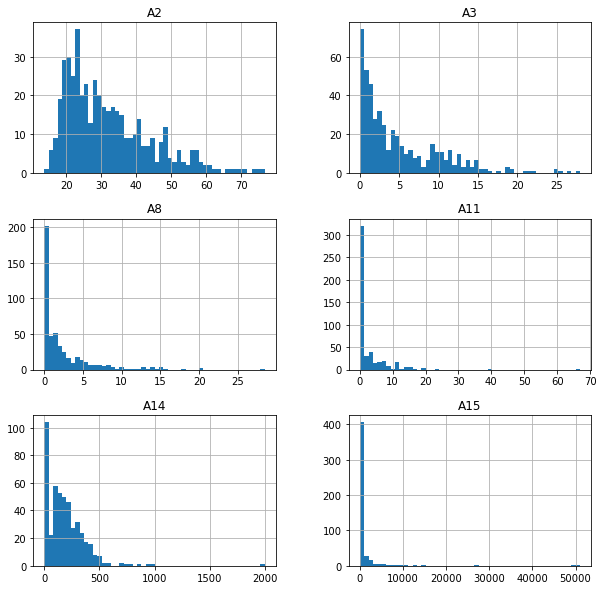

In [315]:
X_train.hist(bins=50, figsize=(10,10))
plt.show()

In this dataset, as most variables are continuous, we can easily estimate missing values with regression models using MICE.

In [316]:
# let's create a MICE imputer using Bayes as estimator

imputer = IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=10, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0,
)

In [317]:
# perform MICE

imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), random_state=0, skip_complete=True)

In [318]:
# transform the data - replace the missing values

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [319]:
# after the imputation there is no more data missing

pd.DataFrame(train_t, columns=X_train.columns).isnull().sum()

A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
dtype: int64

## Lets compare imputation with different models

In [320]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [321]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [322]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=5),
    max_iter=10,
    random_state=0)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
    max_iter=500,
    random_state=0)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=100,
    random_state=0)

In [323]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

C:\Users\abdul.meral\Anaconda3\envs\tensorflow_torch\lib\site-packages\sklearn\impute\_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 max_iter=100, random_state=0)

In [324]:
# replace NA

X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

In [325]:
predictors = [var for var in variables if var !='A16']

In [326]:
# transform numpy array to dataframe
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

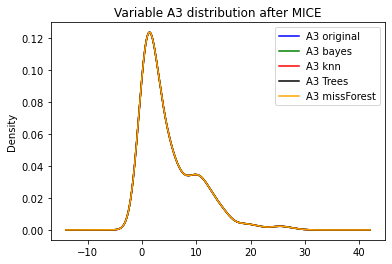

In [329]:
# plot the distribution of the imputed variable

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.title('Variable A3 distribution after MICE')
plt.show()